# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

# Dataset filepaths




In [ ]:
datapath = r'/content/drive/MyDrive/Group05/Classification/NLS_Group05.txt'

In [ ]:
dataset=np.loadtxt(datapath,skiprows=1)
class1_data=dataset[:1303]
class2_data=dataset[1303:]

In [ ]:
def plot(class1,class2):  
  x1 , y1 = class1[:,0] , class1[:,1]  
  x2 , y2 = class2[:,0] , class2[:,1]
 
  c1=plt.scatter(x1, y1, color='r',edgecolors='black')
  c2=plt.scatter(x2, y2, color='g',edgecolors='black')
  plt.title("Non-Linearly Separable Input Data")
  plt.legend((c1,c2),("class1","class2"))
  # plt.savefig("/content/drive/MyDrive/Group05/results/nl_input.png")

## Plots of Class data points

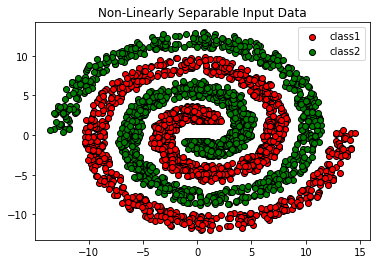

In [ ]:
  plot(class1_data,class2_data)

## Train Test Split (70%-30%)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.7*row)
  train = data[:n]
  test = data[n:row]
  return train, test

In [ ]:
class1_train , class1_test = train_test_split(class1_data)
class2_train , class2_test = train_test_split(class2_data)

# Activation Function

In [ ]:
def sigmoid_af(x):
  s = 1/(1+np.exp(-(x)))
  return s

# Training

In [ ]:
def perceptron_model_train(train_data):
  N, d = train_data.shape
  theta = np.array([.2,0.2,0.3])
  epochs=100
  err = []
  avg_err = []

  while(epochs):    

    for i in range(N):
      
      x=[1,train_data[i,0], train_data[i, 1]]
      
      a=np.dot(theta.T,x) #activation value

      y_pred = sigmoid_af(a) #activation function

      if i<len(class1_train):
        y_op = 0
      else:
        y_op = 1

      error = 0.5*(y_op - y_pred)**2
      eta = 0.01
      err.append(error)
      delt = eta*(y_op-y_pred)*y_pred*(1-y_pred)
      delt = np.dot(delt, x)
      theta = theta + delt

    error_avg = sum(err)/len(err)
    avg_err.append(error_avg)
    epochs = epochs-1
  return theta, avg_err


In [ ]:
class_train = np.append(class1_train,class2_train,axis=0)
class_test = np.append(class1_test,class2_test,axis=0)

In [ ]:
theta, avg_err = perceptron_model_train(class_train)

# Testing

In [ ]:
def perceptron_test_model(test_data, theta):    
    N, d = test_data.shape
    y_pred_list = []

    for i in range(N):
        x = [1, test_data[i, 0], test_data[i, 1]]
        a = np.dot(theta.T, x)
        yp = sigmoid_af(a)
        if yp <=0.5:
          y_pred_list.append(0)
        else:
          y_pred_list.append(1)        
    return y_pred_list

In [ ]:
def get_max_min(c1,c2):
  xmax = int(max([max(c1[0]), max(c2[0])]))
  ymax = int(max([max(c1[1]), max(c2[1])]))
  xmin = int(min([min(c1[0]), min(c2[0])]))
  ymin = int(min([min(c1[1]), min(c2[1])]))
  return xmax , ymax , xmin , ymin


In [ ]:
xmax , ymax , xmin , ymin = get_max_min(class1_data,class2_data)

points = []
for i in range(xmin-5, xmax+10):
    for j in range(ymin-7, ymax+10):
        points.append([i, j])
points=np.array(points)


# Decision Region Plot

In [ ]:
def decision_region_plot(train_data,theta):
  x1 , y1 , x2 , y2= [] , [] , [] , [] 
  
  y_pred = perceptron_test_model(points, theta)
  N, d = points.shape
  for i in range(N):
      if y_pred[i] == 0:
          x1.append(points[i, 0])
          y1.append(points[i, 1])
      else:
          x2.append(points[i, 0])
          y2.append(points[i, 1])

  plt.scatter(x1, y1, marker='s', s=500, color='pink')
  plt.scatter(x2, y2, marker='s', s=500, color='yellow')
  plt.legend(['Class 1 ','Class 2'])
  plt.scatter(class1_data[:,:1], class1_data[:,1:2],edgecolors='black')
  plt.scatter(class2_data[:,:1], class2_data[:,1:2],edgecolors='black')

  plt.title("Decision Region Plot for Class 1 and 2 ")
  plt.tight_layout()
  # plt.savefig("/content/drive/MyDrive/Group05/results/NLS_Class.png")
  plt.show()


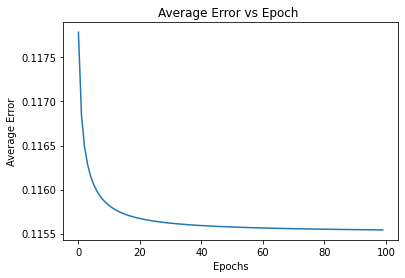

In [ ]:

  plt.plot(avg_err)
  plt.title("Average Error vs Epoch ")
  plt.xlabel("Epochs")
  plt.ylabel("Average Error")
  # plt.savefig("/content/drive/MyDrive/Group05/results/NLsavgErrorvsEpoch.png")
  plt.show()


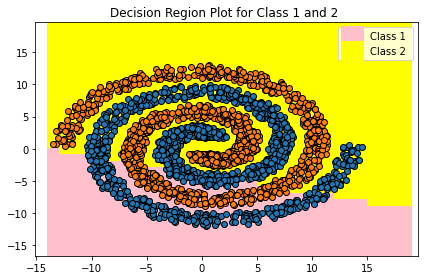

In [ ]:
decision_region_plot(class_train,theta)

In [ ]:
y1,y2=np.empty(391),np.empty(391)
y1.fill(0)
y2.fill(1)
y_true=np.append(y1,y2)
y_pred= perceptron_test_model(class_test,theta)
print(confusion_matrix(y_true,y_pred))

[[142 249]
 [ 80 311]]


# Accuracy

In [ ]:
print("ACCURACY OF LINEARLY SEPARABLE DATA: ",accuracy_score(y_true, y_pred))

ACCURACY OF LINEARLY SEPARABLE DATA:  0.5792838874680307


# Classification Report

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.36      0.46       391
         1.0       0.56      0.80      0.65       391

    accuracy                           0.58       782
   macro avg       0.60      0.58      0.56       782
weighted avg       0.60      0.58      0.56       782

